In [1]:
import datadotworld as dw

#data handling, model creation/evaluation
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

#make it so that we only show first 4 decimals for floats
np.set_printoptions(precision=4,suppress=True)

# visualization
%matplotlib inline
import seaborn as sns

In [2]:
rookie_data_key = 'https://data.world/exercises/logistic-regression-exercise-1'
rookie_data_set_local = dw.load_dataset(rookie_data_key) 

In [3]:
rookies = rookie_data_set_local.dataframes['nba_logreg']

In [5]:
pd.set_option('display.max_columns', None)

In [11]:
null_rows = pd.isnull(rookies).any(1).nonzero()[0]

In [15]:
rookies.loc[null_rows]['3p'] = 0

In [18]:
rookies = rookies.fillna(0)

In [179]:
feature_columns = list(rookies.columns.drop(['target_5yrs','name']))

In [180]:
feature_columns

['gp',
 'min',
 'pts',
 'fgm',
 'fga',
 'fg',
 '3p_made',
 '3pa',
 '3p',
 'ftm',
 'fta',
 'ft',
 'oreb',
 'dreb',
 'reb',
 'ast',
 'stl',
 'blk',
 'tov',
 '5yr_prob',
 'tot_min',
 'eFG',
 'ts']

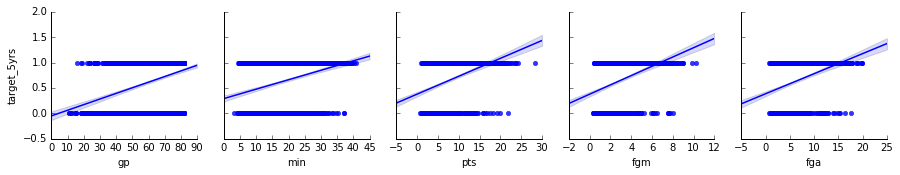

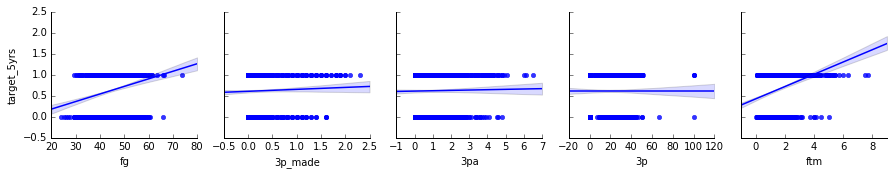

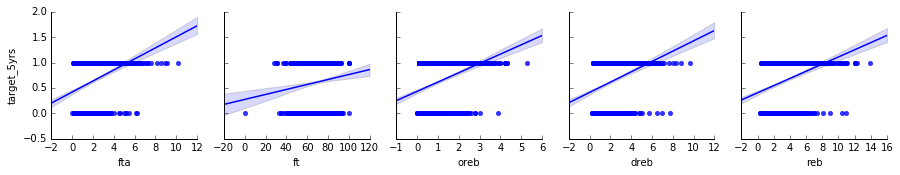

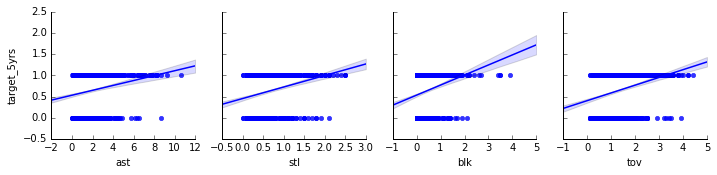

In [70]:
sns.pairplot(rookies, x_vars = feature_columns[0:5], y_vars = 'target_5yrs', kind='reg')
sns.pairplot(rookies, x_vars = feature_columns[5:10], y_vars = 'target_5yrs', kind='reg')
sns.pairplot(rookies, x_vars = feature_columns[10:15], y_vars = 'target_5yrs', kind='reg')
sns.pairplot(rookies, x_vars = feature_columns[15:19], y_vars = 'target_5yrs', kind='reg')

In [72]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [181]:
X = rookies[feature_columns]
y = rookies['target_5yrs']
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [182]:
rookies['5yr_prob'] = linreg.predict(X)

In [101]:
rookies2.rename(columns={'5yr_prob': '5yr_prob_basic'})

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs,5yr_prob_basic
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0,0.211152
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0,0.263200
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0,0.518354
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0,0.585356
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0,0.534048
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,0.4,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0.0,0.607002
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,1.5,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1.0,0.653315
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,0.7,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1.0,0.474392
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,0.4,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0.0,0.516105
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,1.0,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0.0,0.380827


In [102]:
rookies.rename(columns={'5yr_prob': '5yr_prob_basic'})

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs,5yr_prob_basic
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0,0.211152
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0,0.263200
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0,0.518354
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0,0.585356
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0,0.534048
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,0.4,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0.0,0.607002
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,1.5,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1.0,0.653315
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,0.7,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1.0,0.474392
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,0.4,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0.0,0.516105
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,1.0,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0.0,0.380827


In [185]:
rookies.sort_values("ts",ascending=False)

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs,5yr_prob,tot_min,eFG,ts
1109,Jelani McCoy,26,12.7,5.1,2.2,2.9,73.7,0.0,0.0,0.0,0.8,1.6,50.0,1.0,2.0,3.0,0.2,0.4,0.8,0.4,1.0,0.412162,330.2,0.758621,0.707547
728,Jeff Ayres,39,10.4,2.7,1.1,1.7,66.2,0.0,0.0,0.0,0.5,0.5,90.0,0.6,1.9,2.5,0.0,0.2,0.4,0.3,1.0,0.701478,405.6,0.647059,0.703125
692,Jeremy Evans,49,9.4,3.6,1.6,2.3,66.1,0.0,0.0,0.0,0.5,0.8,70.3,0.7,1.2,2.0,0.5,0.3,0.3,0.4,1.0,0.618103,460.6,0.695652,0.678733
301,Mason Plumlee,70,18.2,7.4,2.8,4.3,65.9,0.0,0.0,0.0,1.7,2.8,62.6,1.4,3.0,4.4,0.9,0.7,0.8,1.1,0.0,0.731177,1274.0,0.651163,0.668836
524,Garry Witts,46,10.7,2.9,1.1,1.8,58.3,0.0,0.0,50.0,0.7,0.9,82.5,0.6,0.7,1.3,0.8,0.4,0.1,0.8,0.0,0.688327,492.2,0.611111,0.660291
1110,Brad Miller,38,12.3,6.3,2.1,3.6,56.5,0.0,0.1,50.0,2.1,2.7,79.4,0.9,2.2,3.1,0.6,0.2,0.5,0.8,1.0,0.622537,467.4,0.583333,0.657895
791,Carl Landry,42,16.9,8.1,3.2,5.2,61.6,0.0,0.0,0.0,1.7,2.6,66.1,2.3,2.6,4.9,0.5,0.4,0.2,0.6,1.0,0.623011,709.8,0.615385,0.638398
500,Steve Johnson,78,22.3,12.8,5.1,8.3,61.3,0.0,0.0,0.0,2.7,4.2,64.2,1.9,3.9,5.9,1.2,0.5,1.1,2.5,1.0,0.788435,1739.4,0.614458,0.630666
1302,Rex Walters,48,8.0,3.4,1.3,2.4,52.2,0.3,0.6,50.0,0.6,0.7,82.4,0.1,0.7,0.8,1.5,0.3,0.1,0.6,1.0,0.659691,384.0,0.604167,0.627770
497,Jeff Ruland,82,27.0,14.4,5.1,9.1,56.1,0.0,0.0,33.3,4.2,5.5,75.2,3.1,6.2,9.3,1.6,0.5,0.7,2.9,1.0,0.909307,2214.0,0.560440,0.625000


In [107]:
rookies['eFG'] = ((rookies['fgm'] * rookies['gp']) + (.5 * rookies['3p_made'] * rookies['gp'])) / (rookies['fga'] * rookies['gp']) 

In [114]:
rookies['ts'] = rookies['pts'] / (2*(rookies['fga'] + (.44 * rookies['fta'])))

In [124]:
rookies[['name', 'min', 'fga', 'eFG', 'ts', 'target_5yrs']].sort_values('ts', ascending=False)

,name,min,fga,eFG,ts,target_5yrs
1109,Jelani McCoy,12.7,2.9,0.758621,0.707547,1.0
728,Jeff Ayres,10.4,1.7,0.647059,0.703125,1.0
692,Jeremy Evans,9.4,2.3,0.695652,0.678733,1.0
301,Mason Plumlee,18.2,4.3,0.651163,0.668836,0.0
524,Garry Witts,10.7,1.8,0.611111,0.660291,0.0
1110,Brad Miller,12.3,3.6,0.583333,0.657895,1.0
791,Carl Landry,16.9,5.2,0.615385,0.638398,1.0
500,Steve Johnson,22.3,8.3,0.614458,0.630666,1.0
1302,Rex Walters,8.0,2.4,0.604167,0.627770,1.0
497,Jeff Ruland,27.0,9.1,0.560440,0.625000,1.0


In [163]:
coefficients = pd.DataFrame(list(zip(X, linreg.coef_)), columns=['feature', 'importance'])

,feature,importance
6,3p_made,0.657514
9,ftm,0.112513
4,fga,0.087308
14,reb,0.084645
17,blk,0.084009
12,oreb,0.048347
15,ast,0.041699
5,fg,0.011064
0,gp,0.007633
16,stl,0.004683


In [171]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [174]:
scaler.fit(X)
X_scaled = scaler.transform(X)

In [178]:
pd.DataFrame(X_scaled, columns=list(X.columns))

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov
0,-1.400901,1.177066,0.137401,-0.017294,0.477347,-1.543407,0.658041,1.244354,0.364603,0.306333,0.361484,-0.037855,-0.398290,1.010852,0.517997,0.237640,-0.533458,0.073254,0.147338
1,-1.458281,1.116860,0.091486,-0.373816,0.226801,-2.374651,1.179494,1.903829,0.271121,1.319630,1.193248,0.586286,-0.655746,-0.018938,-0.308447,1.461613,1.175502,0.306415,0.562695
2,0.779563,-0.279912,-0.367659,-0.373816,-0.329969,-0.320991,0.397315,0.867511,0.327210,-0.402975,-0.394665,-0.312099,-0.655746,-0.239607,-0.405676,-0.374347,-0.289321,-0.159906,-0.268019
3,-0.138527,-0.725434,-0.252873,-0.195555,-0.107261,-0.255795,-0.384863,-0.263016,0.215032,-0.402975,-0.394665,-0.132422,-0.012104,-0.828059,-0.551519,-0.510344,-0.045184,-0.626228,-0.268019
4,-0.712333,-0.737475,-0.528360,-0.611497,-0.803224,1.341496,-0.645589,-0.639859,-1.193430,0.002344,0.059025,-0.274272,-0.012104,-0.386720,-0.259833,-0.850337,-0.777595,0.073254,-0.544923
5,0.836943,-0.749516,-0.712018,-0.670917,-0.664031,-0.304692,0.136589,0.302247,0.832013,-0.909623,-0.999584,0.274216,-1.041932,-0.975172,-1.086277,0.169641,-0.533458,-0.859388,-0.683375
6,0.090995,-0.809722,-0.046257,-0.076714,-0.023746,-0.109105,-0.645589,-0.639859,1.922636,0.205004,-0.016590,1.021294,-0.655746,-0.460277,-0.502905,-0.646341,-1.021732,-0.626228,-0.683375
7,-0.712333,-0.881968,-0.252873,-0.195555,-0.135100,-0.435083,0.397315,0.679090,0.676210,-0.605634,-0.772739,1.626521,-0.269561,-0.828059,-0.648748,-0.918335,-1.021732,-0.626228,-0.683375
8,0.263137,-0.930133,-1.010463,-0.968019,-0.970255,-0.809957,-0.384863,-0.263016,0.258657,-0.909623,-0.999584,0.103995,-1.041932,-1.048728,-1.086277,0.509634,-0.777595,-0.859388,-0.129566
9,-1.056617,-1.098709,-0.712018,-0.730337,-0.664031,-0.956647,-0.384863,-0.451438,0.140246,-0.301645,-0.319050,-0.236445,-0.784475,-0.975172,-0.940434,-0.850337,-1.021732,-0.859388,-0.683375
